In [1]:
! pip install shap

In [2]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/aqi_features_v1.csv")
df["date"] = pd.to_datetime(df["date"])


In [4]:
DROP_COLS = [
    "date",
    "aqi_target_1d",
    "aqi_target_2d",
    "aqi_target_3d",
    "aqi_delta_3d"
]

X = df.drop(columns=[c for c in DROP_COLS if c in df.columns])


In [5]:
model = joblib.load("/content/random_forest_multi_output.pkl")


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MultiOutputRegressor from version 1.7.2 when using version 1.6.1. This might lead 

In [6]:
base_model = model.estimators_[0]  # 1-day ahead


SHAP EXPLAINER

In [7]:
explainer = shap.TreeExplainer(base_model)
shap_values = explainer.shap_values(X)


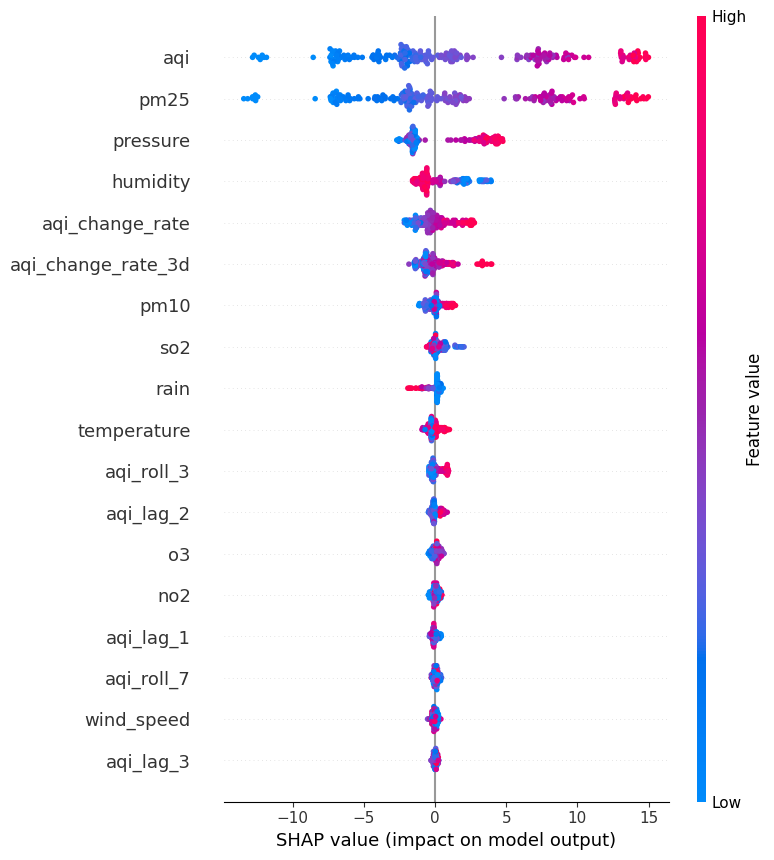

In [8]:
shap.summary_plot(shap_values, X)


* PM2.5 and AQI lag features are the most influential predictors, confirming domain expectations.

Feature Importance

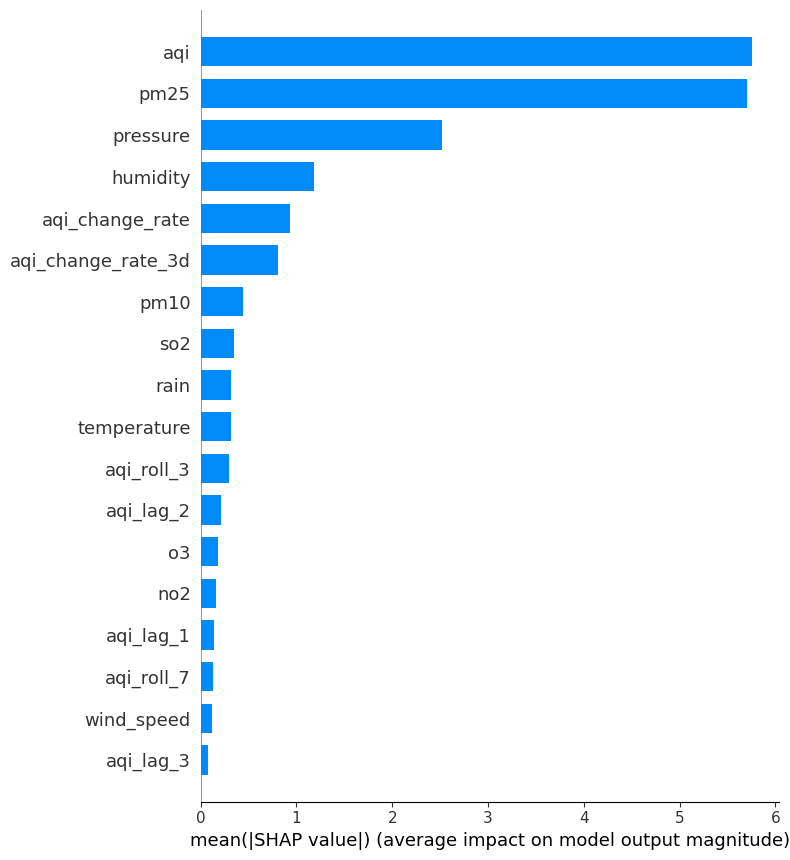

In [9]:
shap.summary_plot(shap_values, X, plot_type="bar")


SHAP Dependence Plot

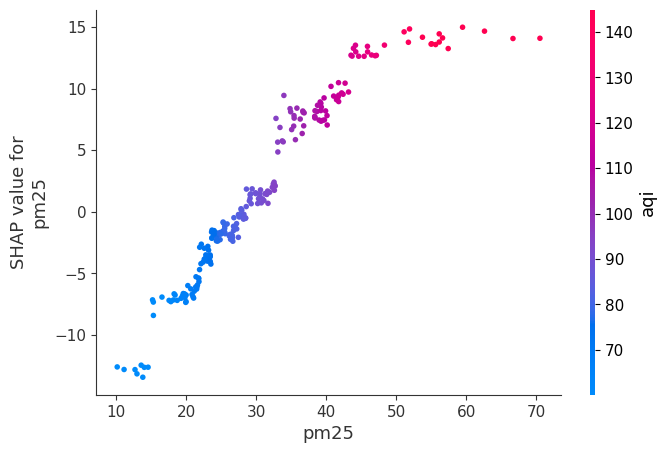

In [10]:
shap.dependence_plot("pm25", shap_values, X)


* Higher PM2.5 consistently increases AQI prediction

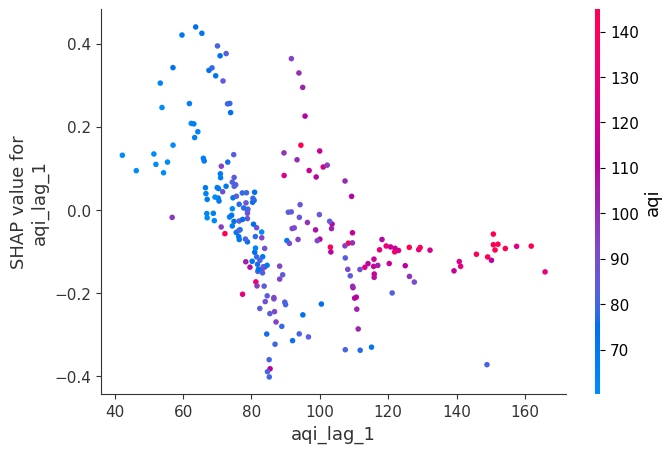

In [11]:
shap.dependence_plot("aqi_lag_1", shap_values, X)


* Shows autoregressive behavior

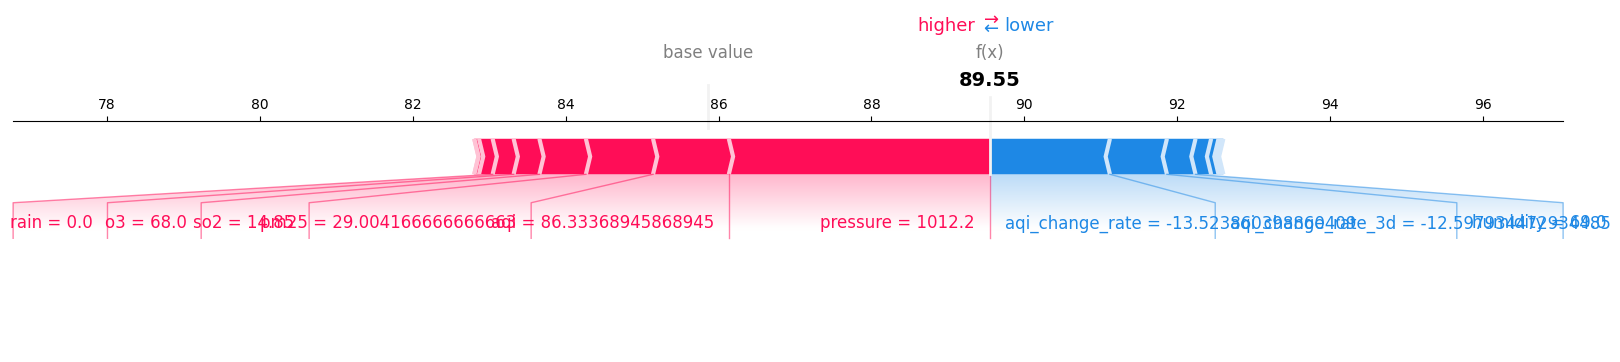

In [12]:
i = -1  # latest row

shap.force_plot(
    explainer.expected_value,
    shap_values[i],
    X.iloc[i],
    matplotlib=True
)


The SHAP force plot explains the AQI prediction for a single day by showing how individual features push the prediction higher or lower than the base value.

PM2.5, O₃, and SO₂ contribute positively (red), indicating that higher pollutant concentrations increase the predicted AQI, which aligns with environmental science.

Pressure also increases AQI slightly, suggesting stable atmospheric conditions that may trap pollutants.

On the other hand, AQI change rate and 3-day AQI change rate contribute negatively (blue), indicating recent improvement in air quality which pulls the AQI prediction downward.

The final AQI value is the net effect of these opposing influences